# Punto numero 1

In [29]:

def dfs(grafo, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(grafo[vertex] - visited)
    return visited

grafo = {'1': set(['2', '3']),
         '2': set(['1', '4', '5']),
         '3': set(['1', '6']),
         '4': set(['2']),
         '5': set(['2', '6']),
         '6': set(['3', '4'])}

dfs(grafo, '1')

{'1', '2', '3', '4', '5', '6'}

# punto numero 2

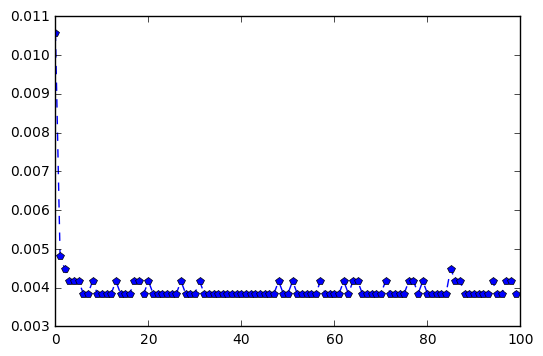

In [34]:
import math
import numpy as np
import pylab as pl
import time 
import random 
import pylab  
import math
import numpy as np


gafo = {'A': set(['D', 'F']),
         'B': set(['C', 'A', 'F']),
         'C': set(['A', 'F']),
         'D': set(['C']),
         'E': set(['B', 'F']),
         'F': set(['A', 'F'])}

def exper_analysis_time(n):
    results = []
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        tic = time.clock()
        dfs(graph, 'A') 
        toc = time.clock()
        results.append((toc-tic))
    return results


pylab.clf()
x = np.arange(100)
y = np.array(exper_analysis_time(100))*1000

pylab.plot(x, y, 'p--')
pylab.show()

# Punto numero3

In [31]:
global cont
def rec(adjLists, visited, v,lista):
    global cont
    visited[v] = True
    for w in adjLists[v]:
        if(not visited[w]):
            lista.append(v)
            dfs_rec(adjLists, visited, w,lista)
        else:
            cont+=1

def ciclo(adjLists):
    global cont
    cont=0
    visited = []
    n = len(adjLists)

        
    for i in range(n):
        for j in range(n):
            visited.append(False)

        lista=[]
        rec(adjLists, visited, i,lista)
        visited = []
    if cont>0:
        print ('existen ciclos' )
        print ( grafo1 )
    else:
        print ('no existen ciclos')
        print ( grafo2 )
        
grafo1 = { 0 : [3,5],
                    1 : [2,4,5],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [1,2,4,0]}

grafo2 = { 0 : [1],
                    1 : [2],
                    2 : [3],
                    3 : [2,0]}

ciclo(grafo1)
ciclo(grafo2)

existen ciclos
{0: [3, 5], 1: [2, 4, 5], 2: [1, 3, 5], 3: [2, 0], 4: [1, 5], 5: [1, 2, 4, 0]}
existen ciclos
{0: [3, 5], 1: [2, 4, 5], 2: [1, 3, 5], 3: [2, 0], 4: [1, 5], 5: [1, 2, 4, 0]}


# punto numero4

In [42]:
def bip(adjLists,inicio):
    n = len(adjLists)
    color=[]
    visited = []
    for k in range(n):
        visited.append(False)
        color.append(0)
    color[0]=1
    sol=True
    for i in range(n):
        for j in adjLists[i]:
            if color[j]==0:
                if color[i]==1:
                    color[j]=2
                else:
                    color[j]=1
            else:
                if color[j]==color[i]:
                    sol=False
            
    print (sol)

grafo1 = { 0 : [3,5],
                    1 : [2,4],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1],
                    5 : [1,2]}
grafo2 = { 0 : [3,5],
                    1 : [2,4],
                    2 : [2,4,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [2,3]}

bip(grafo1,0)
bip(grafo2,0)

False
False


# punto numero5

In [43]:
from collections import defaultdict, deque


class Graph(object):
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance


def dijkstra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = set(graph.nodes)

    while nodes:
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node
        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in graph.edges[min_node]:
            try:
                weight = current_weight + graph.distances[(min_node, edge)]
            except:
                continue
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path


def shortest_path(graph, origin, destination):
    visited, paths = dijkstra(graph, origin)
    full_path = deque()
    _destination = paths[destination]

    while _destination != origin:
        full_path.appendleft(_destination)
        _destination = paths[_destination]

    full_path.appendleft(origin)
    full_path.append(destination)

    return visited[destination], list(full_path)

graph = Graph()

for node in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    graph.add_node(node)

graph.add_edge('A', 'B', 10)
graph.add_edge('B', 'D', 15)
graph.add_edge('C', 'D', 30)
graph.add_edge('B', 'E', 50)
graph.add_edge('E', 'F', 5)
graph.add_edge('F', 'G', 2)

print(shortest_path(graph, 'A', 'F')) 
print(dijkstra(graph,'A'))

(65, ['A', 'B', 'E', 'F'])
({'A': 0, 'B': 10, 'E': 60, 'D': 25, 'G': 67, 'F': 65}, {'B': 'A', 'E': 'B', 'D': 'B', 'G': 'F', 'F': 'E'})
